In [1]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import model_selection
%matplotlib inline

In [2]:
#loading training set in DataFrame 'dataset'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [3]:
#splitting data into traindata and testdata

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(Y_train.shape)
print(X_train)
print("Y_train",Y_train)
print("X_test",X_test)
print("Y_test",Y_test)
#X_train contains training features and Y_train contains class of flower
#X_test contains test dataset features and Y_test contains expected value of class


(120,)
[[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.0 5.9 2.1]
 [6.7 3.3 5.7 2.1]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [6.5 3.0 5.5 1.8]
 [5.7 3.0 4.2 1.2]
 [5.0 3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.0 2.2 4.0 1.0]
 [6.4 2.7 5.3 1.9]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [4.3 3.0 1.1 0.1]
 [6.3 3.3 6.0 2.5]
 [5.5 2.4 3.7 1.0]
 [5.0 2.0 3.5 1.0]
 [6.5 2.8 4.6 1.5]
 [5.0 3.4 1.6 0.4]
 [4.4 2.9 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [6.7 3.1 4.7 1.5]
 [7.3 2.9 6.3 1.8]
 [5.5 2.6 4.4 1.2]
 [5.2 2.7 3.9 1.4]
 [5.7 4.4 1.5 0.4]
 [7.2 3.2 6.0 1.8]
 [5.4 3.4 1.7 0.2]
 [5.8 4.0 1.2 0.2]
 [6.1 2.6 5.6 1.4]
 [5.7 2.5 5.0 2.0]
 [4.8 3.0 1.4 0.1]
 [6.5 3.0 5.8 2.2]
 [4.6 3.2 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 3.0 5.2 2.3]
 [6.1 3.0 4.6 1.4]
 [5.7 3.8 1.7 0.3]
 [7.0 3.2 4.7 1.4]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.2 2.0]
 [7.7 2.6 6.9 2.3]
 [4.9

In [4]:
#distance function for computing distance between two data points
import math
def dist(x1,x2):
    #k=x1.shape[0]
    distance=0

    for i in range(4):
        distance=distance+(np.power((x1[i]-x2[i]),2))
    distance=abs(np.sqrt(abs(distance)))
    return distance
    

In [5]:
    cluster=[]
    clusterr=[]
    clusterc=[]
    cx1=[]
    cx2=[]
    cx3=[]
    cy1=[]
    cy2=[]
    cy3=[]
    
    #splitting the dataset as one matrix for each class i.e. all Iris-setosa features are in cx1, Iris-virginica in cx2 and so on..
    for i in range(len(X_train)):
        if Y_train[i]=='Iris-setosa':
            cx1.append(X_train[i,:])
            cy1.append(Y_train[i])
        elif Y_train[i]=='Iris-virginica':
            cx2.append(X_train[i,:])
            cy2.append(Y_train[i])
        else:
            cx3.append(X_train[i,:])
            cy3.append(Y_train[i])
    cx1=np.array(cx1)
    cx2=np.array(cx2)
    cx3=np.array(cx3)
    cy1=np.array(cy1)
    cy2=np.array(cy2)
    cy3=np.array(cy3)
    print(cx1.shape," ",cx2.shape," ",cx3.shape)
    print(cx1)
    print(cx2)
    print(cx3)
    

(43, 4)   (39, 4)   (38, 4)
[[4.6 3.6 1.0 0.2]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [5.0 3.3 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [4.3 3.0 1.1 0.1]
 [5.0 3.4 1.6 0.4]
 [4.4 2.9 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [5.7 4.4 1.5 0.4]
 [5.4 3.4 1.7 0.2]
 [5.8 4.0 1.2 0.2]
 [4.8 3.0 1.4 0.1]
 [4.6 3.2 1.4 0.2]
 [5.7 3.8 1.7 0.3]
 [4.7 3.2 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [5.5 4.2 1.4 0.2]
 [5.2 3.5 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [5.0 3.4 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.4 3.7 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [4.9 3.0 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.6 1.4 0.2]
 [4.4 3.0 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.8 3.4 1.9 0.2]
 [5.1 3.8 1.9 0.4]
 [5.1 3.8 1.5 0.3]
 [4.6 3.4 1.4 0.3]
 [5.1 3.5 1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [5.1 3.3 1.7 0.5]
 [5.0 3.0 1.6 0.2]]
[[6.2 2.8 4.8 1.8]
 [6.9 3.1 5.4 2.1]
 [7.1 3.0 5.9 2.1]
 [6.7 3.3 5.7 2.1]
 [6.4 2.8 5.6 2.2]
 [6.5 3.0 5.5 1.8]
 [6.4 2.7 5.3 1.9]
 [7.7 3.8 6.7 2.2]
 [

In [6]:
    #initializing interclass distance arrays
    intercl1=np.empty(shape=(len(cx1),(len(cx2)+len(cx3))))
    intercl2=np.empty(shape=(len(cx2),(len(cx1)+len(cx3))))
    intercl3=np.empty(shape=(len(cx3),(len(cx2)+len(cx1))))

    
    
    for i in range(len(cx1)):
        for j in range(len(cx2)):
            intercl1[i,j]=dist(cx1[i,:],cx2[j,:])
    for i in range(len(cx1)):
        for k in range(len(cx2),len(cx2)+len(cx3)):
            intercl1[i,k]=dist(cx1[i,:],cx3[k-len(cx2),:])
            print("___",intercl1[i,j])
    print("Interclass1",intercl1)              
    
    for i in range(len(cx2)):
        for j in range(len(cx1)):
            intercl2[i,j]=dist(cx2[i,:],cx1[j,:])
        for j in range(len(cx1),len(cx1)+len(cx3)):
            intercl2[i,j]=dist(cx2[i,:],cx3[j-len(cx1),:])
    print("Interclas2",intercl2)                #here lies the problem!intercl2 contains values '0' for later indices
    
    for i in range(len(cx3)):
        for j in range(len(cx1)):
            intercl3[i,j]=dist(cx3[i,:],cx1[j,:])
        for j in range(len(cx1),len(cx1)+len(cx2)):
            intercl3[i,j]=dist(cx3[i,:],cx2[j-len(cx1),:])
    print("Interclass3",intercl3)               #here lies the problem!intercl3 contains values '0' for later indices
    
    #initialize matrices for intraclass distance
    intrac1=np.zeros(shape=(len(cx1),len(cx1)))
    intrac2=np.zeros(shape=(len(cx2),len(cx2)))
    intrac3=np.zeros(shape=(len(cx3),len(cx3)))
    
    for i in range(len(cx1)):
        for j in range(len(cx1)):
            intrac1[i,j]=dist(cx1[i,:],cx1[j,:])
    print("Intra1",intrac1.shape)  #intraclass becomes 0 too!
    print("Intra1",intrac1)
    for i in range(len(cx2)):
        for j in range(len(cx2)):
            intrac2[i,j]=dist(cx2[i,:],cx2[j,:])
    print("Intra2",intrac2)
    
    for i in range(len(cx3)):
        for j in range(len(cx3)):
            intrac3[i,j]=dist(cx3[i,:],cx3[j,:])
    print("Intra3",intrac3)
    
    cx1min=np.zeros(shape=(len(cx1),1))
    cx2min=np.zeros(shape=(len(cx2),1))
    cx3min=np.zeros(shape=(len(cx3),1))
    
    #Finding minimum of each row interclass distance matrix
    for i in range(len(intercl1)):
        cx1min[i]=min(intercl1[i])
    print("Cmin1",cx1min)
    
    for i in range(len(intercl2)):
        cx2min[i]=min(intercl2[i])
    print("Cmin2",cx2min)
    
    
    for i in range(len(intercl3)):
        cx3min[i]=min(intercl3[i])
    print("Cmin3",cx3min)
    
    

___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 5.20576603393
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063786503
___ 4.7063

___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.56289381862
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.45308881564
___ 4.71805044483
___ 4.71805044483
___ 4.71805044483
___ 4.7180

In [7]:
    cx1max=np.zeros(shape=(len(cx1),1))
    cx2max=np.zeros(shape=(len(cx2),1))
    cx3max=np.zeros(shape=(len(cx3),1))
    for i in range(len(intrac1)):
        cx1max[i]=max(intrac1[i])
    print("Cmax1",cx1max)
    
    for i in range(len(intrac2)):
        cx2max[i]=max(intrac2[i])
    print("Cmax2",cx2max)
    
    
    for i in range(len(intrac3)):
        cx3max[i]=max(intrac3[i])
    print("Cmax3",cx3max)
    
    

Cmax1 [[ 1.46287388]
 [ 1.67032931]
 [ 1.3190906 ]
 [ 1.57162336]
 [ 1.09087121]
 [ 1.32287566]
 [ 1.57797338]
 [ 1.71464282]
 [ 1.18321596]
 [ 2.04205779]
 [ 1.22474487]
 [ 1.99749844]
 [ 1.161895  ]
 [ 2.04205779]
 [ 1.3190906 ]
 [ 1.80831413]
 [ 1.69410743]
 [ 1.64316767]
 [ 1.73205081]
 [ 1.58745079]
 [ 1.59687194]
 [ 1.72626765]
 [ 1.10905365]
 [ 1.17473401]
 [ 1.23693169]
 [ 1.43527001]
 [ 1.36747943]
 [ 1.27279221]
 [ 1.46628783]
 [ 1.62788206]
 [ 1.28840987]
 [ 1.55563492]
 [ 1.08627805]
 [ 1.93132079]
 [ 1.55563492]
 [ 1.41774469]
 [ 1.41774469]
 [ 1.21655251]
 [ 1.49331845]
 [ 1.1045361 ]
 [ 1.79164729]
 [ 1.27279221]
 [ 1.58113883]]
Cmax2 [[ 2.64952826]
 [ 1.78325545]
 [ 1.81659021]
 [ 1.72336879]
 [ 1.98242276]
 [ 1.95192213]
 [ 2.22485955]
 [ 2.94788059]
 [ 1.81659021]
 [ 2.21359436]
 [ 1.99248588]
 [ 2.41867732]
 [ 2.93598365]
 [ 1.73205081]
 [ 2.01246118]
 [ 2.14009346]
 [ 2.92232784]
 [ 2.14709106]
 [ 2.92232784]
 [ 2.69443872]
 [ 2.76586334]
 [ 2.63438797]
 [ 1.7233687

In [8]:
    #skip this
    sub1=np.zeros(shape=(len(cx1),1))
    sub2=np.zeros(shape=(len(cx2),1))
    sub3=np.zeros(shape=(len(cx3),1))
    
    sub1=cx1min-cx1max
    sub2=cx2min-cx2max
    sub3=cx3min-cx3max
    
    print("sub1",sub1)
    print("sub2",sub2)
    print("sub3",sub3)

sub1 [[ 1.04112292]
 [ 0.21115946]
 [ 0.88545017]
 [ 0.48507302]
 [ 0.95851894]
 [ 0.68211811]
 [ 0.27135082]
 [ 0.20108159]
 [ 0.7840156 ]
 [ 0.30315009]
 [ 0.58356926]
 [ 0.00749533]
 [ 0.63254084]
 [ 0.54830898]
 [ 0.5248183 ]
 [ 0.79744871]
 [ 0.28073433]
 [ 0.38414582]
 [ 0.36079415]
 [ 0.49821457]
 [ 0.1975639 ]
 [ 0.80750424]
 [ 0.90837045]
 [ 0.86977082]
 [ 0.73283987]
 [ 0.69780289]
 [ 0.7749491 ]
 [ 0.6350862 ]
 [ 0.86394821]
 [ 0.28523059]
 [ 0.8423177 ]
 [ 0.3548624 ]
 [ 1.05615048]
 [ 0.17580996]
 [ 0.3548624 ]
 [ 0.29105606]
 [ 0.42345058]
 [ 0.92354095]
 [ 0.57065829]
 [ 0.98591839]
 [ 0.37168348]
 [ 0.36732974]
 [ 0.15955069]]
sub2 [[-2.22526419]
 [-0.83985734]
 [-0.46381529]
 [-0.54015284]
 [-1.09924667]
 [-1.21707521]
 [-1.68634307]
 [-0.60480569]
 [-0.37784076]
 [-0.5795809 ]
 [-0.61771318]
 [-1.86190089]
 [-2.38826109]
 [-0.6411796 ]
 [-1.06377788]
 [-1.42595061]
 [-0.45859084]
 [-1.21435315]
 [-0.81994824]
 [-1.86377633]
 [-0.57954223]
 [-0.53438797]
 [-0.31980191]

In [9]:

cx1min1_r=np.reshape(cx1min,(len(cx1min)))
pcount1=np.array(np.zeros(shape=(len(cx1),2)))
radius1=np.array(np.zeros(shape=(len(cx1),2)))
for i in range(len(cx1)):
    r=cx1min[i]
    max=0
    for j in range(len(cx1)):
        if intrac1[i,j]<=r:
            pcount1[i,0]=pcount1[i,0]+1
            pcount1[i,1]=1
            if max<=intrac1[i,j]:
                max=intrac1[i,j]
                radius1[i,1]=i
    radius1[i,0]=max

    fin_radi=0
    fin_ind=0

                
for i in range(len(radius1)):
    if fin_radi<cx1min1_r[i]-radius1[i,0]:
        fin_radi=cx1min1_r[i]-radius1[i,0]
        fin_ind=radius1[i,1]
fin_radi=cx1max[int(fin_ind),0]    
print(fin_ind,fin_radi)

32.0 1.08627804912


In [10]:
cx1max[int(fin_ind),0]

1.0862780491200219

In [11]:
print(cx1.shape)
print(cx2.shape)
print(cx3.shape)

(43, 4)
(39, 4)
(38, 4)


In [12]:

cx2min2_r=np.reshape(cx2min,(len(cx2min)))
pcount2=np.array(np.zeros(shape=(len(cx2),2)))
radius2=np.array(np.zeros(shape=(len(cx2),2)))
for i in range(len(cx2)):
    r=cx2min[i]
    max=0
    for j in range(len(cx2)):
        if intrac2[i,j]<=r:
            pcount2[i,0]=pcount2[i,0]+1
            pcount2[i,1]=1
            if max<=intrac2[i,j]:
                max=intrac2[i,j]
                radius2[i,1]=i
    radius2[i,0]=max

    fin_radi2=0
    fin_ind2=0

                
for i in range(len(radius2)):
    if fin_radi2<cx2min2_r[i]-radius2[i,0]:
        fin_radi2=cx2min2_r[i]-radius2[i,0]
        fin_ind2=radius2[i,1]
fin_radi2=cx2max[int(fin_ind2),0]
print(fin_ind2,fin_radi2)

32.0 2.45153013443


In [13]:
cx3min3_r=np.reshape(cx3min,(len(cx3min)))
pcount3=np.array(np.zeros(shape=(len(cx3),2)))
radius3=np.array(np.zeros(shape=(len(cx3),2)))
for i in range(len(cx3)):
    r =cx3min[i]
    max=0
    for j in range(len(cx3)):
        if intrac3[i,j]<=r:
            pcount3[i,0]=pcount3[i,0]+1
            pcount3[i,1]=1
            if max<=intrac3[i,j]:
                max=intrac3[i,j]
                radius3[i,1]=i
    radius3[i,0]=max

fin_radi3=0
fin_ind3=0

                
for i in range(len(radius3)):
    if fin_radi3<cx3min3_r[i]-radius3[i,0]:
        fin_radi3=cx3min3_r[i]-radius3[i,0]
        fin_ind3=radius3[i,1]

fin_radi3=cx3max[int(fin_ind3),0]
print(fin_radi3," ",fin_ind3)

2.2825424421   35.0


In [14]:
plt.show()

In [15]:
cx1[:,0:2]

array([[4.6, 3.6],
       [4.8, 3.0],
       [5.5, 3.5],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.0, 3.3],
       [4.7, 3.2],
       [4.6, 3.1],
       [5.1, 3.4],
       [4.3, 3.0],
       [5.0, 3.4],
       [4.4, 2.9],
       [5.0, 3.5],
       [5.7, 4.4],
       [5.4, 3.4],
       [5.8, 4.0],
       [4.8, 3.0],
       [4.6, 3.2],
       [5.7, 3.8],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.5, 4.2],
       [5.2, 3.5],
       [5.1, 3.7],
       [5.0, 3.4],
       [5.0, 3.2],
       [5.4, 3.7],
       [5.4, 3.4],
       [5.4, 3.9],
       [4.9, 3.0],
       [5.3, 3.7],
       [4.9, 3.1],
       [5.0, 3.6],
       [4.4, 3.0],
       [4.9, 3.1],
       [4.8, 3.4],
       [5.1, 3.8],
       [5.1, 3.8],
       [4.6, 3.4],
       [5.1, 3.5],
       [4.4, 3.2],
       [5.1, 3.3],
       [5.0, 3.0]], dtype=object)

In [16]:
fin_radi3

2.2825424421026659

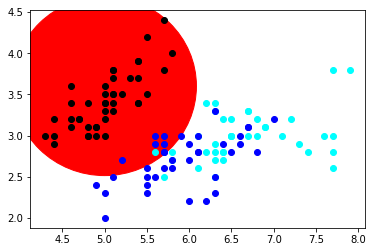

In [17]:
circle1 = plt.Circle((cx1[int(fin_ind),0:2]), fin_radi, color='r')
circle2 = plt.Circle((cx2[int(fin_ind3),0:2]), fin_radi3, color='g')
ax = plt.gca()
ax.cla()

ax.plot(cx1[:,0],cx1[:,1], 'o', color='black')
ax.plot(cx2[:,0],cx2[:,1], 'o', color='cyan')
ax.plot(cx3[:,0],cx3[:,1], 'o', color='blue')
ax.add_artist(circle1)
#ax.add_artist(circle2)


In [18]:
circle2 = plt.Circle((cx2[int(fin_ind3),1:3]), fin_radi3, color='g')



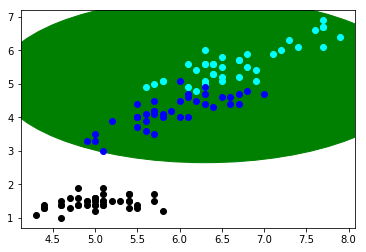

In [19]:
a=cx2[int(fin_ind2),0]
b=cx2[int(fin_ind2),2]
circle2 = plt.Circle((a,b), fin_radi2, color='g')
ax1 = plt.gca()
ax1.cla()
ax1.plot(cx1[:,0],cx1[:,2], 'o', color='black')
ax1.plot(cx2[:,0],cx2[:,2], 'o', color='cyan')
ax1.plot(cx3[:,0],cx3[:,2], 'o', color='blue')
#ax1.plot(X_train[:,3],X_train[:,1], 'o', color='black')
ax1.add_artist(circle2)

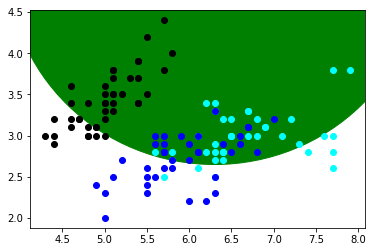

In [20]:
a=cx2[int(fin_ind2),0]
b=cx2[int(fin_ind2),2]
circle2 = plt.Circle((a,b), fin_radi2, color='g')
ax1 = plt.gca()
ax1.cla()
ax1.plot(cx1[:,0],cx1[:,1], 'o', color='black')
ax1.plot(cx2[:,0],cx2[:,1], 'o', color='cyan')
ax1.plot(cx3[:,0],cx3[:,1], 'o', color='blue')
#ax1.plot(X_train[:,3],X_train[:,1], 'o', color='black')
ax1.add_artist(circle2)

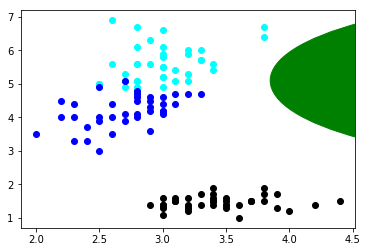

In [21]:
a=cx2[int(fin_ind2),0]
b=cx2[int(fin_ind2),2]
circle2 = plt.Circle((a,b), fin_radi2, color='g')
ax1 = plt.gca()
ax1.cla()
ax1.plot(cx1[:,1],cx1[:,2], 'o', color='black')
ax1.plot(cx2[:,1],cx2[:,2], 'o', color='cyan')
ax1.plot(cx3[:,1],cx3[:,2], 'o', color='blue')
#ax1.plot(X_train[:,3],X_train[:,1], 'o', color='black')
ax1.add_artist(circle2)

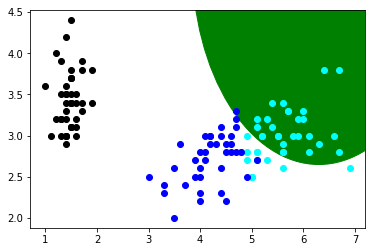

In [22]:
a=cx2[int(fin_ind2),0]
b=cx2[int(fin_ind2),2]
circle2 = plt.Circle((a,b), fin_radi2, color='g')
ax1 = plt.gca()
ax1.cla()
ax1.plot(cx1[:,2],cx1[:,1], 'o', color='black')
ax1.plot(cx2[:,2],cx2[:,1], 'o', color='cyan')
ax1.plot(cx3[:,2],cx3[:,1], 'o', color='blue')
#ax1.plot(X_train[:,3],X_train[:,1], 'o', color='black')
ax1.add_artist(circle2)

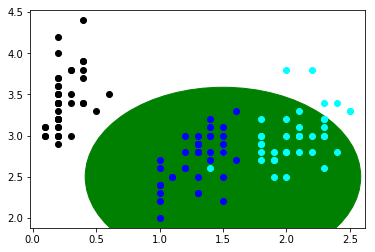

In [23]:
a=cx3[int(fin_ind3),3]
b=cx3[int(fin_ind3),1]
circle2 = plt.Circle((a,b), fin_radi, color='g')
ax2 = plt.gca()
ax2.cla()
ax2.plot(cx1[:,3],cx1[:,1], 'o', color='black')
ax2.plot(cx2[:,3],cx2[:,1], 'o', color='cyan')
ax2.plot(cx3[:,3],cx3[:,1], 'o', color='blue')
#ax1.plot(X_train[:,3],X_train[:,1], 'o', color='black')
ax2.add_artist(circle2)

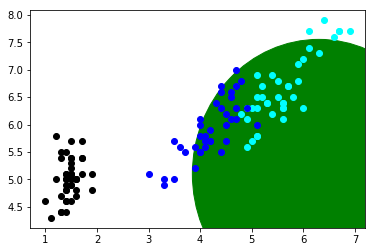

In [24]:
a=cx2[int(fin_ind2),0]
b=cx2[int(fin_ind2),2]
circle2 = plt.Circle((a,b), fin_radi2, color='g')
ax1 = plt.gca()
ax1.cla()
ax1.plot(cx1[:,2],cx1[:,0], 'o', color='black')
ax1.plot(cx2[:,2],cx2[:,0], 'o', color='cyan')
ax1.plot(cx3[:,2],cx3[:,0], 'o', color='blue')
#ax1.plot(X_train[:,3],X_train[:,1], 'o', color='black')
ax1.add_artist(circle2)

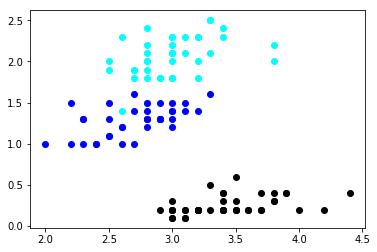

In [25]:
a=cx2[int(fin_ind2),0]
b=cx2[int(fin_ind2),2]
circle2 = plt.Circle((a,b), fin_radi2, color='g')
ax1 = plt.gca()
ax1.cla()
ax1.plot(cx1[:,1],cx1[:,3], 'o', color='black')
ax1.plot(cx2[:,1],cx2[:,3], 'o', color='cyan')
ax1.plot(cx3[:,1],cx3[:,3], 'o', color='blue')
#ax1.plot(X_train[:,3],X_train[:,1], 'o', color='black')
ax1.add_artist(circle2)

In [27]:
#testing
#distance(X_train[0,:], 
cx1[int(fin_ind),:]
dist(X_train[0,:],cx1[int(fin_ind)])
minimum=0
p_class=0
pred_class=[]
for i in range(len(X_test)):
    minimum=min(dist(X_test[i,:],cx1[int(fin_ind)]),dist(X_test[i,:],cx2[int(fin_ind2)]),dist(X_test[i,:],cx3[int(fin_ind3)]))
    #print(minimum)
    if minimum==dist(X_test[i,:],cx1[int(fin_ind)]):
        pred_class.append('Iris-setosa')
    elif minimum==dist(X_test[i,:],cx2[int(fin_ind2)]):
        pred_class.append('Iris-versicolor')
    else:
        pred_class.append('Iris-virginica')
    #assign them to classes
#print("len",len(X_test))
#print("predicted class",pred_class)

#comparing with actual y_test
#print("Test",Y_test)
count=0
for i in range(len(X_test)):
    if pred_class[i]==Y_test[i]:
        count=count+1
print("Accuracy",(count)/30*100)

Accuracy 56.666666666666664
